# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# read the dataset
df=pd.read_csv("ab_data.csv")
# using head to get a glimpse of the data 
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# using info function to know the number of rows, also to ensure there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [4]:
# using nunique to get the no. of unique users in the dataset.
df["user_id"].nunique()

290584

**d.** The proportion of users converted.

In [5]:
# using mean to get the percentage of the converted users
df["converted"].mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# doing  a query to get the number of rows when the "group" is treatment but "landing_page" is not a new_page. (i.e old_page)
df_treat=df.query("group=='treatment' and landing_page=='old_page'")
df_treat.shape[0]

1965

**f.** The number of times when the "group" is `control` but "landing_page" is not a `old_page`.

In [7]:
df_test=df.query("group=='control' and landing_page=='new_page'")
df_test.shape[0]

1928

**g.** Do any of the rows have missing values?

In [8]:
null_check=df_treat.isnull().sum()+df_test.isnull().sum()
print("the total no of null values is {}".format(null_check[0]))

the total no of null values is 0


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df1=df.drop(df_treat.index)
df2=df1.drop(df_test.index)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
# using nunique to get the no. of unique users in the dataset.
df2["user_id"].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# using duplicated to get the data of the duplicated users in the dataset.
df2.loc[df2.duplicated(["user_id"])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [13]:
df2[df2.duplicated(["user_id"], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2=df2.drop([2893], axis=0)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(["user_id"], keep=False)]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [15]:
#use mean to calclate the converted rate
df2["converted"].mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control_conversation=round(df2.groupby("group")["converted"].mean()[0],4)
print("Conversation rate for control group is {}".format(control_conversation))


Conversation rate for control group is 0.1204


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment_conversation=round(df2.groupby("group")["converted"].mean()[1],4)
print("Conversation rate for treatment group is {}".format(treatment_conversation))

Conversation rate for treatment group is 0.1188


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [18]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=treatment_conversation-control_conversation
obs_diff

-0.0015999999999999903

**d.** What is the probability that an individual received the new page?

In [19]:
# we can get the probability from divdiving the total number of new page by the total number of pages (total column)
df_probability=df2[df2.landing_page == "new_page"].count()/df2.shape[0]
df_probability[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**From the above findings, treatment group conversation rate is 11.88% and control conversation rate is 12.04%. which does not indicate that the new page leads to more conversation, but we cannot be certain of this result whether it is true, or due to external bias
but to be completely certain, we will explore it more using the following methods**


<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>If we want to assume the old page had better conversation rate, then the null hypotheses and alternative hypotheses would be  the following:     

>Null Hypothesis: The probability of old page conversation rate is greater or equal to probability of new page conversation rate. 
(P<sub>old</sub> >= P<sub>new</sub>)     

>Alternative Hypothesis: The probability of new page conversation rate is less than that of a old page.
(P<sub>old</sub> < P<sub>new</sub>)  

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [20]:
#since both P_new=P_old=P_population, then both of them will be the same, the mean of the whole population 
#calculating P_new value
p_new=df2["converted"].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [21]:
#since both P_new=P_old=P_population, then both of them will be the same, the mean of the whole population 
#calculating P_new value
p_old=df2["converted"].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [22]:
#the number of users in the treatment group
n_new=df2.groupby("group")["converted"].count()[1]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [23]:
#the number of users in the control group
n_old=df2.groupby("group")["converted"].count()[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [24]:
# Simulate a Sample for the treatment Group


new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
 
new_page_converted.mean()



0.11937237629894708

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [25]:
# Simulate a Sample for the control Group

old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
 
old_page_converted.mean()



0.11897517793961755

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.00039719835932952585


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [27]:
# Sampling distribution 


#run simulation 10000 times
start = time.time()
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    p_diffs.append(new_page_converted - old_page_converted)

end = time. time()
print("time is {}".format(end - start))


time is 50.111331939697266


#### using the above method, will take a long time to calculate the p_diffs as the array is being updated value by value for 10000 times. (around 50 sec) instead we will use the following method, we will use numpy binomial function which way faster than using loops (0.002 sec) "avoid for loops with numpy" as mentioned in Stackoverflow
https://stackoverflow.com/questions/41325427/numpy-ufuncs-speed-vs-for-loop-speed


In [28]:

start = time. time()
new_page_converted = np.random.binomial(n_new, p_new,  10000)/n_new

old_page_converted = np.random.binomial(n_old, p_old,  10000)/n_old

p_diffs = new_page_converted - old_page_converted
end = time. time()
print("time is {}".format(end - start))
print(p_diffs)

time is 0.0
[ 1.48448797e-03  3.92097213e-05  2.04261299e-04 ...  1.56718941e-03
  1.12662552e-03 -1.66763979e-03]


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

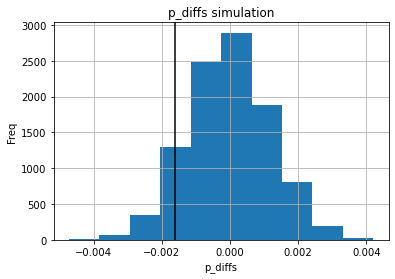

In [29]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color="black")
plt.grid()
plt.xlabel("p_diffs")
plt.ylabel("Freq")
plt.title("p_diffs simulation");
plt.show()

since the orginial mean falls within the bulk of the graph, it is problably mean we can't reject the null hypothesis 

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
#calculating the p value
(p_diffs > obs_diff).mean()

0.9102

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**This value is called P-value, and having high P-value indicate that, we can't reject the null hypothesis, and it means that the new page doesn't have higher conversation rate than the old one **



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:

# number of conversions with the old_page
convert_old = (df2.query('landing_page == "old_page" & converted == 1')).count()[0]

# number of conversions with the new_page
convert_new = (df2.query('landing_page == "new_page" & converted == 1')).count()[0]

# number of individuals who were shown the old_page
n_old =  df2.groupby("group")["converted"].count()[0]

# number of individuals who received new_page
n_new =  df2.groupby("group")["converted"].count()[1]

print(convert_old,convert_new,n_old,n_new)

17489 17264 145274 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>**the Z-score and P-value doesnt reject the null hypothesis, as we can the P-value is almost the same like the one calculated above, hence we can confirm the new page wont generate higher conversation rate. also since the p-value is higher than 0.05 (> 0.05), then it is not statistically significant and indicates strong evidence for the null hypothesis **

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Since the answer is binary (conversion,no conversion), then Logistic Regression is the best approach in this scenario, since we want to predict something that has only two possible outcomes.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
#it is always better to have multiple versions to return to in case some mistake happens while handling the data
df_regression=df2.copy()
df_regression

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [34]:
# adding intercept column
df_regression["intercept"] = 1

# using pd.get_dummies to convert the categorical values to 1s and 0s values which the library can work with (crash on categorical )
df_regression[["new_page", "old_page"]] = pd.get_dummies(df_regression["landing_page"])
df_regression[["ab_control_group","ab_treatment_group"]] = pd.get_dummies(df_regression["group"])
df_regression.drop(["old_page","ab_control_group"],axis=1,inplace=True)
df_regression

,user_id,timestamp,group,landing_page,converted,intercept,new_page,ab_treatment_group
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0
...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [35]:
logit_mod = sm.Logit(df_regression["converted"],df_regression[["intercept","ab_treatment_group"]])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        14:12:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_treatment_group    -0.0150      0.011     -1.311      0.190      -0.037       0.007
======================================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>**As we can see from the above table, the p value is equal to 0.19 which is still higher than 0.05 hence,the coefficient is not statistically significant and indicates strong evidence for the null hypothesis
in the first part, the null hypothesis was assuming that the conversation rate is the same between the old and the new pages and the alternative is the new has a higher rate which assumes a one-tailed test.
but the Logistic Regression method assumes a two-tailed test.
the difference in the p-values stems from using different methods (adding interpect column in Logistic regression and using Logistic equtions)**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**multi factor regression has many advantages like (offering better insights on the factors that affect the result) but also suffer from these disadvantages (the model gets more complex and also multiple variables could be correctled with each others which in turn could have flipped relationships in our multiple linear regression models)**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [37]:
# Read the countries.csv
country_df = pd.read_csv('./countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Join with the df2 dataframe
df_joined = country_df.set_index("user_id").join(df2.set_index("user_id"), how="inner")
df_joined.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [39]:
# Create the necessary dummy variables
df_joined['intercept'] = 1
df_joined[["CA","UK","USA"]]=pd.get_dummies(df_joined["country"])
df_final=df_joined.drop(["UK"],axis=1)
df_final.head()

,country,timestamp,group,landing_page,converted,intercept,CA,USA
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0


In [40]:
# Fit your model, and summarize the results
logit_mod = sm.Logit(df_final["converted"], df_final[["intercept","CA","USA"]])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:               1.521e-05
Time:                        14:12:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
USA           -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

**if we looked at the country p-values,country has no influence as both of their P-values are above 0.05**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [42]:
df_final[["ab_control_group","ab_treatment_group"]] = pd.get_dummies(df_final["group"])
df_final["USA_new"] = df_final["USA"] * df_final["ab_treatment_group"] 
df_final["CA_new"] = df_final["CA"] * df_final["ab_treatment_group"] 

df_final.drop(["ab_control_group"],axis=1,inplace=True)
df_final

,country,timestamp,group,landing_page,converted,intercept,CA,USA,ab_treatment_group,USA_new,CA_new
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,1,0,0,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,0,0,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,0,0,0


In [43]:
# Fit your model, and summarize the results
lm = sm.Logit(df_final["converted"], df_final[["intercept","CA","USA","ab_treatment_group","USA_new","CA_new"]])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [44]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Pseudo R-squared: 0.000      
Dependent Variable:   converted        AIC:              212782.6602
Date:                 2022-03-23 14:12 BIC:              212846.1381
No. Observations:     290584           Log-Likelihood:   -1.0639e+05
Df Model:             5                LL-Null:          -1.0639e+05
Df Residuals:         290578           LLR p-value:      0.19199    
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       6.0000                                        
--------------------------------------------------------------------
                    Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
intercept          -1.9922   0.0161 -123.4571 0.0000 -2.0238 -1.9606
CA                 -0.0118   0.0398   -0.2957 0.7674 -0.0899  0.0663
USA                 0.0057   0.0188    0.3057 0.7598 -0.0311  0.0426
ab_treatment_group  0.0108   0.0228    0.4749 0.6349 -0.0339  0.0555
USA_new            -0.0314   0.0266   -1.1807 0.2377 -0.0835  0.0207
CA_new             -0.0783   0.0568   -1.3783 0.1681 -0.1896  0.0330
====================================================================

"""

>**from the above table, we can see that the P-values for the interaction variables are higher than 0.05 which mean the effect of the USA is the same as the effect of CA
Hence, we can conclude that,there is no effect of the multiple factors (countries and the group) on the conversation ratio**

## In conclusion:

We can say that, by using null testing and logistic regression, the new page conversion rate will not be higher than the old one, even if we added multiple variables like countries it wont make a difference
No Further testing is needed, since the sample size is big enough and it is recommended to stay with the old page or create another new page completely and start evaluating it


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1